### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_columns',500)

In [2]:
tweets_df = pd.read_csv('vaccine_tweets.csv')

In [3]:
tweets_df.head(2) 

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1386122456713228288,1386122456713228288,2021-04-25 06:28:41 India Standard Time,2021-04-25,06:28:41,530,1373531468744552448,vaxhunterscan,Vaccine Hunters Canada,NaN,We had an issue where twitter seemed to have m...,en,"[{'screen_name': 'twittercanada', 'name': 'twi...",[],[],46,127,1704,[],[],https://twitter.com/VaxHuntersCan/status/13861...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1386111987608821763,1386111987608821763,2021-04-25 05:47:05 India Standard Time,2021-04-25,05:47:05,530,166985027,naheedd,Naheed Dosani,NaN,Can someone nominate the team @VaxHuntersCan f...,en,"[{'screen_name': 'vaxhunterscan', 'name': 'vac...",[],[],10,161,1325,['covid19'],[],https://twitter.com/NaheedD/status/13861119876...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
tweets_df.shape

(24744, 36)

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 36 columns):
id                 24744 non-null int64
conversation_id    24744 non-null int64
created_at         24744 non-null object
date               24744 non-null object
time               24744 non-null object
timezone           24744 non-null int64
user_id            24744 non-null int64
username           24744 non-null object
name               24744 non-null object
place              3 non-null object
tweet              24744 non-null object
language           24744 non-null object
mentions           24744 non-null object
urls               24744 non-null object
photos             24744 non-null object
replies_count      24744 non-null int64
retweets_count     24744 non-null int64
likes_count        24744 non-null int64
hashtags           24744 non-null object
cashtags           24744 non-null object
link               24744 non-null object
retweet            24744 non-null bool
qu

In [6]:
tweets_df.nunique()

id                 24744
conversation_id    23858
created_at         24621
date                 924
time               20916
timezone               1
user_id             9871
username            9871
name                9754
place                  3
tweet              24707
language              26
mentions            1352
urls                2742
photos              3702
replies_count       2285
retweets_count      5218
likes_count        10860
hashtags            1339
cashtags               6
link               24744
retweet                1
quote_url           1913
video                  2
thumbnail           4943
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to             567
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

#### Initial Observation
- Total tweets Successfully collected 24744 Tweets
- Total number of rows to be worked on 24744
- 10 columns with all null value
- 3 column with more than 80% null values


### Checking for nytimes / cnn / usnews value counts

In [7]:
df_nytimestweets = tweets_df[tweets_df['username'] == 'nytimes']
df_nytimestweets['username'].value_counts()

nytimes    83
Name: username, dtype: int64

####  most popular tweeter news account CNN Breaking News (60.2m followers) has only 47 tweets regarding Vaccine

In [8]:
df_cnntweets = tweets_df[tweets_df['username'] == 'cnnbrk']
df_cnntweets['username'].value_counts()

cnnbrk    48
Name: username, dtype: int64

In [9]:
df_usnewstweets = tweets_df[tweets_df['username'] == 'usnews']
df_usnewstweets['username'].value_counts() 

Series([], Name: username, dtype: int64)

### Dropping columns with more than 60% null value

In [10]:
tweets_df = tweets_df.loc[:, tweets_df.isnull().mean() < .6]

#### Checking for users with number of tweets

In [11]:
tweets_df['username'].value_counts()

kylegriffin1      194
spectatorindex    188
drericding        152
aslavitt          136
ani               116
                 ... 
emergjenncy         1
izukuuu_shonen      1
sojoulaye           1
justinwelby         1
jarredamato         1
Name: username, Length: 9871, dtype: int64

#### number of languages tweets

In [12]:
tweets_df['language'].value_counts()

en     24061
tl       149
fr       128
hi        94
ja        70
in        52
und       46
pt        44
es        29
it        23
cs        12
de         6
ca         5
ht         5
ro         4
da         3
et         3
tr         2
mr         1
ur         1
nl         1
fi         1
th         1
lt         1
ar         1
fa         1
Name: language, dtype: int64

In [13]:
tweets_df['cashtags'].value_counts()

[]                                       24739
['pfe', 'mrna', 'nvax', 'azn', 'jnj']        1
['pfe']                                      1
['pfe', 'mrna']                              1
['zm']                                       1
['mrna']                                     1
Name: cashtags, dtype: int64

In [14]:
tweets_df['video'].value_counts() 

0    19720
1     5024
Name: video, dtype: int64

In [15]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 23 columns):
id                 24744 non-null int64
conversation_id    24744 non-null int64
created_at         24744 non-null object
date               24744 non-null object
time               24744 non-null object
timezone           24744 non-null int64
user_id            24744 non-null int64
username           24744 non-null object
name               24744 non-null object
tweet              24744 non-null object
language           24744 non-null object
mentions           24744 non-null object
urls               24744 non-null object
photos             24744 non-null object
replies_count      24744 non-null int64
retweets_count     24744 non-null int64
likes_count        24744 non-null int64
hashtags           24744 non-null object
cashtags           24744 non-null object
link               24744 non-null object
retweet            24744 non-null bool
video              24744 non-null int64

### Checking dates and converting it into datetime

In [16]:
tweets_df['date'].min()

'2013-02-17'

In [17]:
tweets_df['date'].max()

'2021-04-25'

In [18]:
tweets_df['date']= pd.to_datetime(tweets_df['date']) 

In [19]:
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month

In [20]:
tweets_df['year'].value_counts() 

2021    14179
2020     9728
2019      541
2018      184
2017       69
2015       18
2016       14
2014        9
2013        2
Name: year, dtype: int64

#### Catplot for number of tweets based on month and year

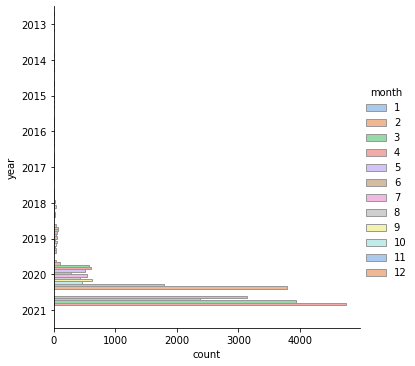

In [21]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df)

#### Observation
- Most of the tweets are from 2020 onwards so we can make the assumption , the talk of vaccine became more popular since COVID19 started

#### Selecting tweets after 1/1/2020

In [22]:
ts = pd.to_datetime('1/1/2020')
tweets_df_r = tweets_df.loc[tweets_df.date >= ts,: ] 

In [23]:
tweets_df_r.shape

(23907, 25)

In [24]:
tweets_df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23907 entries, 0 to 23906
Data columns (total 25 columns):
id                 23907 non-null int64
conversation_id    23907 non-null int64
created_at         23907 non-null object
date               23907 non-null datetime64[ns]
time               23907 non-null object
timezone           23907 non-null int64
user_id            23907 non-null int64
username           23907 non-null object
name               23907 non-null object
tweet              23907 non-null object
language           23907 non-null object
mentions           23907 non-null object
urls               23907 non-null object
photos             23907 non-null object
replies_count      23907 non-null int64
retweets_count     23907 non-null int64
likes_count        23907 non-null int64
hashtags           23907 non-null object
cashtags           23907 non-null object
link               23907 non-null object
retweet            23907 non-null bool
video              23907 non-nu

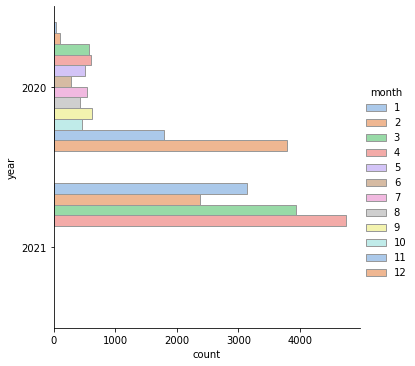

In [25]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df_r)

In [26]:
tweets_df_r.groupby(['year','month']).size().unstack(fill_value=0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,42,109,579,600,503,280,540,432,619,456,1787,3781
2021,3135,2370,3931,4743,0,0,0,0,0,0,0,0


#### Observation
- Clearly the number of tweets with regards to vaccine has been the highest in 25 days of April 2021

### Creating a subset and working on it

In [27]:
subset = ['date', 'tweet', 'month','year']
tweets_df_r1 = tweets_df_r.loc[:, subset] 
tweets_df_r1.head() 

,date,tweet,month,year
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021


In [28]:
tweets_df_r1.shape

(23907, 4)

### Checking the word frequency

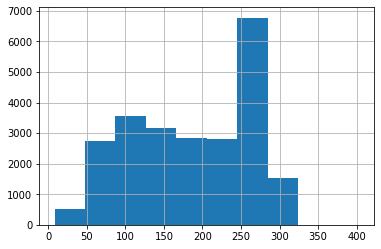

In [29]:
tweets_df_r1['tweet'].str.len().hist() 

#### Observation
- The histogram shows that the tweets range from **5 to 320 characters** and generally, it is between **50 to 250 characters.**

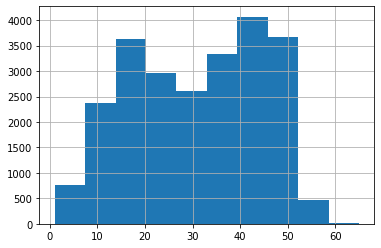

In [30]:
tweets_df_r1['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist() 

#### Observation
The histogram shows that the tweets at the **number of word level** range from 1 to 58 words and generally, it is between 10 to 50 words.

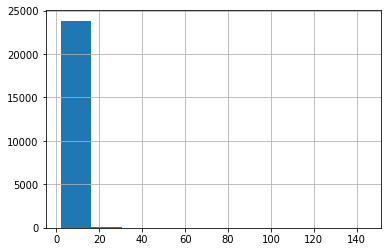

In [31]:
tweets_df_r1['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#### Observation
The histogram shows **Average number of word** us 2-18

### NLTK

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Adding Tokenized column

In [33]:
tweets_df_r1['tt'] = tweets_df_r1['tweet'].apply(word_tokenize)

In [34]:
tweets_df_r1.head()

,date,tweet,month,year,tt
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t..."
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt..."
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g..."
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad..."
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,..."


### Adding sentiment through TextBlob
- **Polarity** is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
- **Subjectivity** is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [35]:
from textblob import TextBlob

In [36]:
def clean_tweet(tweets_df_r1, tt):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [37]:
def sentiment_calc(tt):
    try:
        return TextBlob(tt).sentiment
    except:
        return None
    
tweets_df_r1['sentiment'] = tweets_df_r1['tweet'].apply(sentiment_calc)

In [38]:
tweets_df_r2 = tweets_df_r1
sentiment_series = tweets_df_r2['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
tweets_df_r2 = pd.DataFrame(sentiment_series, columns=columns, index=tweets_df_r2.index)

In [39]:
tweets_df_r2.head()

,polarity,subjectivity
0,0.200000,0.243750
1,0.266667,0.308333
2,-0.159375,0.687500
3,0.218750,0.343750
4,0.056250,0.258333


In [40]:
tweets_df_r2.shape

(23907, 2)

In [41]:
tweets_df_r1['polarity'] = tweets_df_r2['polarity']
tweets_df_r1['subjectivity'] = tweets_df_r2['subjectivity'] 

In [42]:
tweets_df_r1.head() 

,date,tweet,month,year,tt,sentiment,polarity,subjectivity
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t...","(0.2, 0.24375)",0.200000,0.243750
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt...","(0.26666666666666666, 0.3083333333333333)",0.266667,0.308333
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g...","(-0.15937500000000002, 0.6875)",-0.159375,0.687500
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad...","(0.21875, 0.34375)",0.218750,0.343750
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,...","(0.056249999999999994, 0.25833333333333336)",0.056250,0.258333


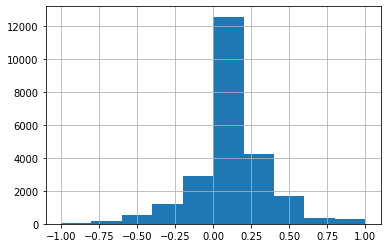

In [43]:
tweets_df_r1['polarity'].hist() 

In [44]:
# create a list of our conditions
conditions = [
    (tweets_df_r1['polarity'] > 0),
    (tweets_df_r1['polarity'] == 0),
    (tweets_df_r1['polarity'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
tweets_df_r1['sentiment1'] = np.select(conditions, values)

# display updated DataFrame
tweets_df_r1.head()

,date,tweet,month,year,tt,sentiment,polarity,subjectivity,sentiment1
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t...","(0.2, 0.24375)",0.200000,0.243750,positive
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt...","(0.26666666666666666, 0.3083333333333333)",0.266667,0.308333,positive
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g...","(-0.15937500000000002, 0.6875)",-0.159375,0.687500,negative
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad...","(0.21875, 0.34375)",0.218750,0.343750,positive
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,...","(0.056249999999999994, 0.25833333333333336)",0.056250,0.258333,positive


#### Subjectivity 
- It quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

In [45]:
# create a list of our conditions
conditions = [
    (tweets_df_r1['subjectivity'] < 0.5),
    (tweets_df_r1['subjectivity'] >= 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['objective', 'subjective']

# create a new column and use np.select to assign values to it using our lists as arguments
tweets_df_r1['sentiment2'] = np.select(conditions, values)

# display updated DataFrame
tweets_df_r1.head()

,date,tweet,month,year,tt,sentiment,polarity,subjectivity,sentiment1,sentiment2
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t...","(0.2, 0.24375)",0.200000,0.243750,positive,objective
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt...","(0.26666666666666666, 0.3083333333333333)",0.266667,0.308333,positive,objective
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g...","(-0.15937500000000002, 0.6875)",-0.159375,0.687500,negative,subjective
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad...","(0.21875, 0.34375)",0.218750,0.343750,positive,objective
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,...","(0.056249999999999994, 0.25833333333333336)",0.056250,0.258333,positive,objective


In [46]:
tweets_df_r1['sentiment1'].value_counts()

positive    12567
neutral      6493
negative     4847
Name: sentiment1, dtype: int64

In [47]:
tweets_df_r1['sentiment2'].value_counts()

objective     14826
subjective     9081
Name: sentiment2, dtype: int64

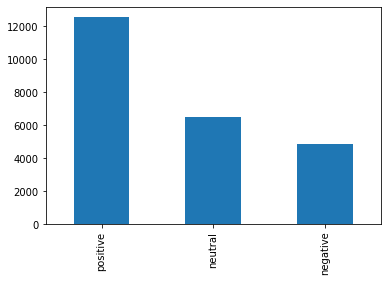

In [48]:
tweets_df_r1['sentiment1'].value_counts().plot.bar() 

In [49]:
tweets_df_r3 = pd.DataFrame(np.random.rand(10, 4), columns=["month", "year", "sentiment1","sentiment2"])

In [50]:
subset = ['sentiment1', 'month','year','sentiment2']
tweets_df_r3 = tweets_df_r1.loc[:, subset] 
tweets_df_r3.head(2) 

,sentiment1,month,year,sentiment2
0,positive,4,2021,objective
1,positive,4,2021,objective


In [51]:
tweets_df_r3.groupby(['month','year','sentiment1','sentiment2']).size().unstack(fill_value=0)

sentiment2             objective  subjective
month year sentiment1                       
1     2020 negative            4           7
           neutral            13           0
           positive           11           7
      2021 negative          341         354
           neutral           740          72
           positive          814         814
2     2020 negative           10          12
           neutral            23           4
           positive           26          34
      2021 negative          261         214
           neutral           553          67
           positive          663         612
3     2020 negative           57          67
           neutral           129          12
           positive          163         151
      2021 negative          401         394
           neutral          1005          86
           positive         1116         929
4     2020 negative           66          72
           neutral           127          13
           positive          171         151
      2021 negative          506         488
           neutral          1229         142
           positive         1188        1190
5     2020 negative           50          55
           neutral            96           9
           positive          142         151
6     2020 negative           28          45
           neutral            63           8
           positive           68          68
7     2020 negative           55          46
           neutral           124          14
           positive          166         135
8     2020 negative           37          48
           neutral           116          14
           positive          119          98
9     2020 negative           62          68
           neutral           155          17
           positive          183         134
10    2020 negative           45          40
           neutral           117          11
           positive          125         118
11    2020 negative          127         166
           neutral           373          41
           positive          474         606
12    2020 negative          362         359
           neutral          1045          75
           positive         1077         863

In [146]:
tweets_df_r3.groupby(['year','month','sentiment2','sentiment1']).size().unstack(fill_value=0)

sentiment1             negative  neutral  positive
year month sentiment2                             
2020 1     objective          4       13        11
           subjective         7        0         7
     2     objective         10       23        26
           subjective        12        4        34
     3     objective         57      129       163
           subjective        67       12       151
     4     objective         66      127       171
           subjective        72       13       151
     5     objective         50       96       142
           subjective        55        9       151
     6     objective         28       63        68
           subjective        45        8        68
     7     objective         55      124       166
           subjective        46       14       135
     8     objective         37      116       119
           subjective        48       14        98
     9     objective         62      155       183
           subjective        68       17       134
     10    objective         45      117       125
           subjective        40       11       118
     11    objective        127      373       474
           subjective       166       41       606
     12    objective        362     1045      1077
           subjective       359       75       863
2021 1     objective        341      740       814
           subjective       354       72       814
     2     objective        261      553       663
           subjective       214       67       612
     3     objective        401     1005      1116
           subjective       394       86       929
     4     objective        506     1229      1188
           subjective       488      142      1190

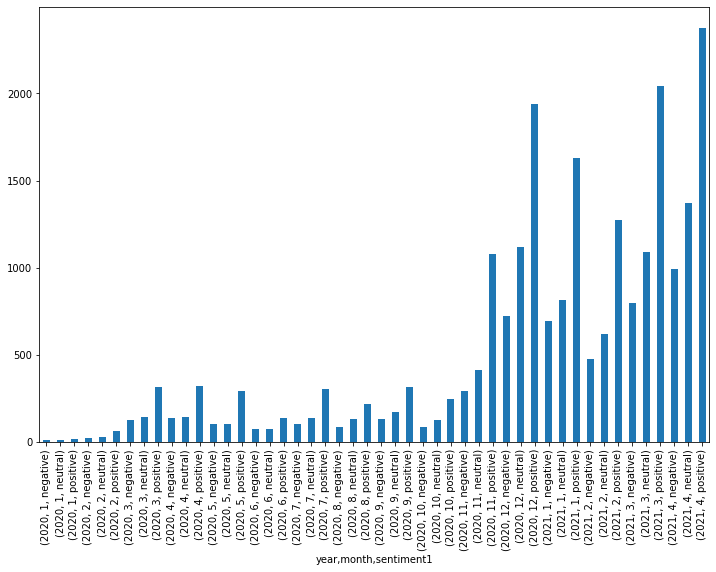

In [52]:
tweets_df_r3.groupby(['year','month','sentiment1']).size().plot.bar(stacked=True ,figsize=(12, 8)); 

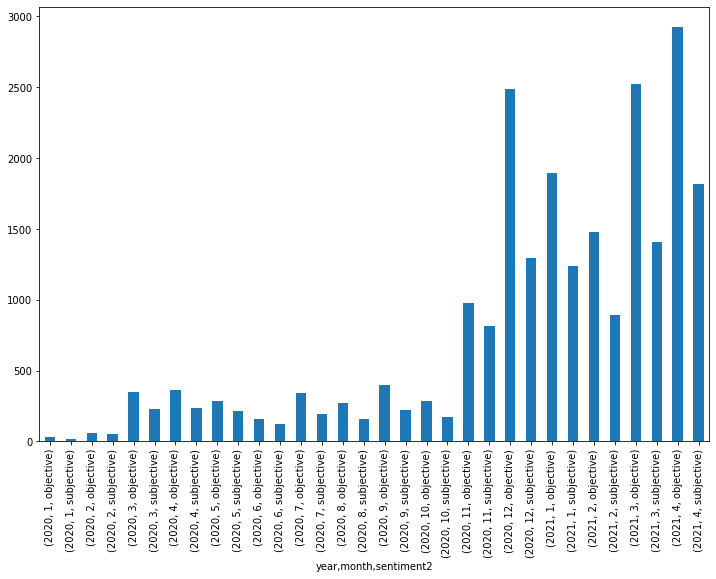

In [53]:
tweets_df_r3.groupby(['year','month','sentiment2']).size().plot.bar(stacked=True ,figsize=(12, 8)); 

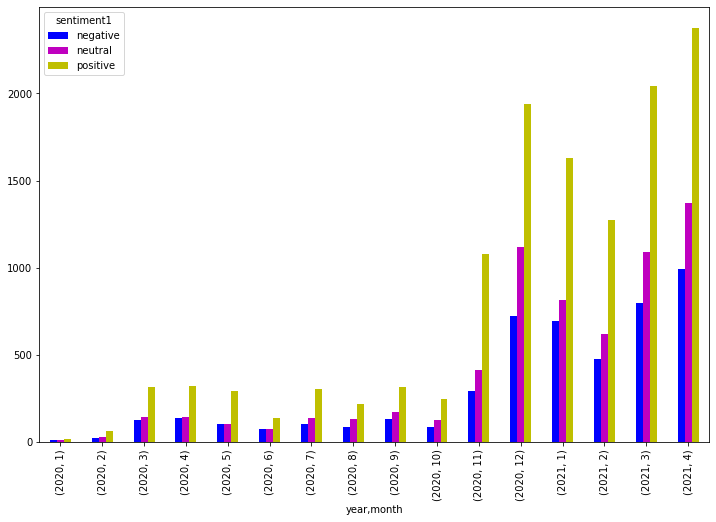

In [138]:
tweets_df_r3.groupby(['year','month','sentiment1']).sentiment1.count().unstack().plot(figsize=(12, 8),kind='bar', legend=True, color=['b', 'm', 'y'])

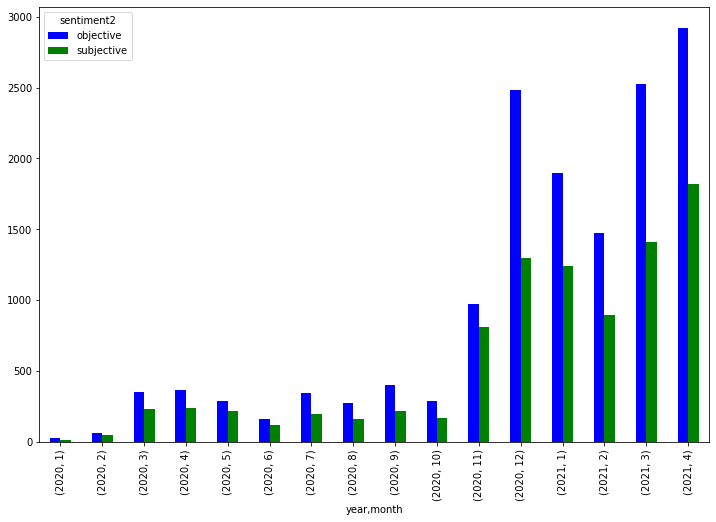

In [132]:
tweets_df_r3.groupby(['year','month','sentiment2']).sentiment2.count().unstack().plot(figsize=(12, 8),kind='bar', legend=True, color=['b', 'g', 'r'])

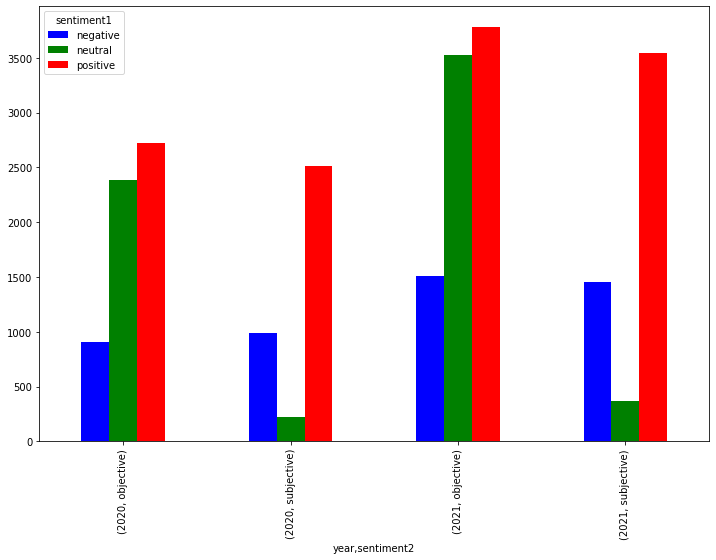

In [142]:
tweets_df_r3.groupby(['year','sentiment2','sentiment1']).month.count().unstack().plot(figsize=(12, 8),kind='bar', legend=True, color=['b', 'g', 'r'])

#### Spliting into training and testing data sets

In [56]:
train_tweets = tweets_df_r1.sample(frac = 0.75)

In [57]:
test_tweets = tweets_df_r1.drop(train_tweets.index) 

In [58]:
train_tweets.shape

(17930, 10)

In [59]:
test_tweets.shape 

(5977, 10)

In [60]:
train_tweets.to_csv('train_data.csv',index=False)  

In [61]:
test_tweets.to_csv('test_data.csv',index=False)   

### Train Tweet EDA

#### Stop words and Corpus

In [62]:
# stopwords = nltk.corpus.stopwords.words('english')
# new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
# for i in new_words:
#     stopwords.append(i)
    
    
stopwords = list(nltk.corpus.stopwords.words('english'))
new_words=['&amp;','http','https','co',"''", '""', '...', '``','@','#',"'","`",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%']
stopwords.extend(new_words)
#     for i in new_words:
#         stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
# stop=set(stopwords.words('english'))

corpus=[]
newtt= train_tweets['tweet'].str.split()
newtt=newtt.values.tolist()
corpus=[word for i in newtt for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

#### Plotting the top 10 stopwords & non stopwords

In [64]:
def plot_top_stopwords_barchart(tweet):
#     stopwords = nltk.corpus.stopwords.words('english')    
#     new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
#     for i in new_words:
#         stopwords.append(i)
   
    newtt= train_tweets['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stopwords:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

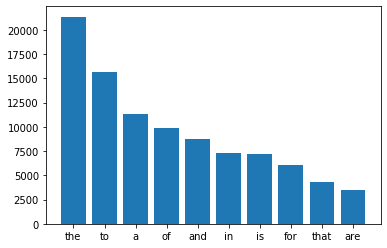

In [65]:
plot_top_stopwords_barchart(train_tweets['tweet']) 

#### Word level Analysis on through counter function
- A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

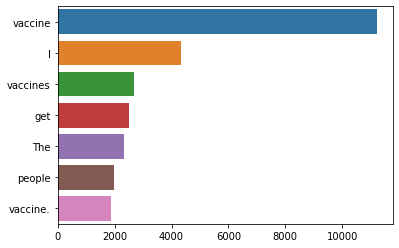

In [66]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [67]:
from collections import  Counter

def plot_top_non_stopwords_barchart(tweet):
#     stopwords = nltk.corpus.stopwords.words('english')    
#     new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
#     for i in new_words:
#         stopwords.append(i)
    
    newtt= train_tweets['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

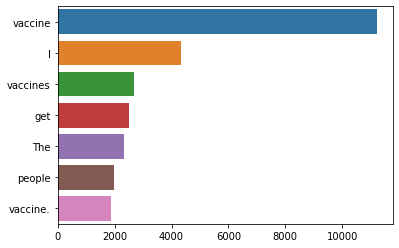

In [68]:
plot_top_non_stopwords_barchart(train_tweets['tweet'])

### Ngram exploration

In [69]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [70]:
def plot_top_ngrams_barchart(tweet, n=2):
#     stopwords = nltk.corpus.stopwords.words('english')   
#     new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
#     for i in new_words:
#         stopwords.append(i)
        
    newtt= train_tweets['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
        top_n_bigrams=_get_top_ngram(tweet,n)[:10]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x)

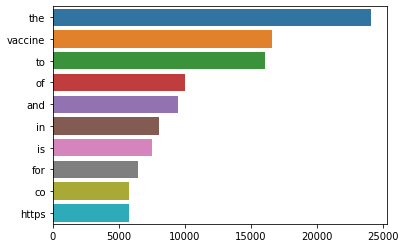

In [71]:
plot_top_ngrams_barchart(train_tweets['tweet'],1)

#### Top N Bigram

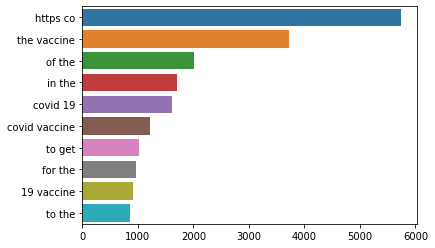

In [72]:
plot_top_ngrams_barchart(train_tweets['tweet'],2)

#### Top N Trigram

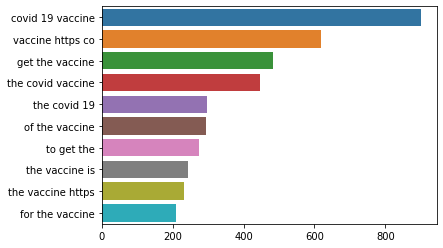

In [73]:
plot_top_ngrams_barchart(train_tweets['tweet'],3) 

#### Top N Quadgram

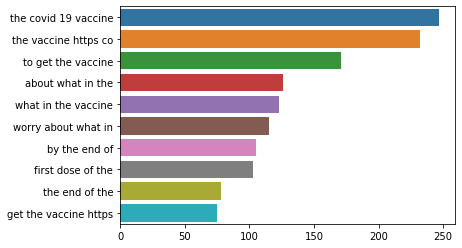

In [74]:
plot_top_ngrams_barchart(train_tweets['tweet'],4)  

In [75]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_tweet(train_tweets):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tweet in train_tweets['tweet']:
        words=[w for w in word_tokenize(tweet) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_tweet(train_tweets) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Bag Of Words using genism & the LDA model: Latent Dirichlet Allocation (LDA)

In [76]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [77]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.060*"vaccine" + 0.011*"get" + 0.009*"people" + 0.008*"The" + 0.007*"Trump" + 0.007*"one" + 0.006*"first" + 0.005*"got" + 0.005*"Biden" + 0.005*"take"'),
 (1,
  '0.059*"vaccine" + 0.011*"get" + 0.007*"people" + 0.006*"mask" + 0.006*"The" + 0.005*"need" + 0.005*"passport" + 0.004*"like" + 0.004*"Covid" + 0.004*"getting"'),
 (2,
  '0.011*"Vaccine" + 0.010*"vaccine" + 0.007*"VACCINE" + 0.005*"THE" + 0.004*"Speed" + 0.004*"Warp" + 0.004*"Operation" + 0.003*"COVID" + 0.003*"Gates" + 0.003*"Dr."'),
 (3,
  '0.051*"vaccine" + 0.010*"dos" + 0.009*"million" + 0.009*"India" + 0.008*"The" + 0.007*"Pfizer" + 0.007*"COVID-19" + 0.005*"trial" + 0.005*"coronavirus" + 0.005*"COVID19"')]

In [78]:
from pyLDAvis import gensim_models

#### Python LDA visualization through pyLDAvis

In [79]:
import pyLDAvis
import pyLDAvis.sklearn
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
pyLDAvis.enable_notebook() 
vis = gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.125378  0.026749       1        1  41.024085
1      0.086945  0.106249       2        1  28.019775
3      0.040479 -0.157576       3        1  23.579145
2     -0.252802  0.024577       4        1   7.376995, topic_info=                 Term         Freq        Total Category  logprob  loglift
6             Vaccine   889.000000   889.000000  Default  30.0000  30.0000
472             India   649.000000   649.000000  Default  29.0000  29.0000
1364              dos   844.000000   844.000000  Default  28.0000  28.0000
1084             mask   588.000000   588.000000  Default  27.0000  27.0000
128               get  2399.000000  2399.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1542          company    40.594625   280.207024   Topic4  -6.3564   0.6749
211   realDonaldTrump    37.480939   230.664239   Topic4  -6.4362   0.7897
303             Fauci    35.188170   252.854791   Topic4  -6.4993   0.6347
400             Trump    44.899838  1188.143083   Topic4  -6.2556  -0.6689
87                The    34.500143  2232.268060   Topic4  -6.5190  -1.5630

[315 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4751      1  0.029894        AND
4751      2  0.209257        AND
4751      3  0.074735        AND
4751      4  0.687560        AND
1394      4  0.979438        ARE
...     ...       ...        ...
605       3  0.138066       year
605       4  0.004490       year
259       3  0.985421       yung
4391      4  0.965294        में
3839      4  0.963096  新型コロナワクチン

[576 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

#### Wordcloud

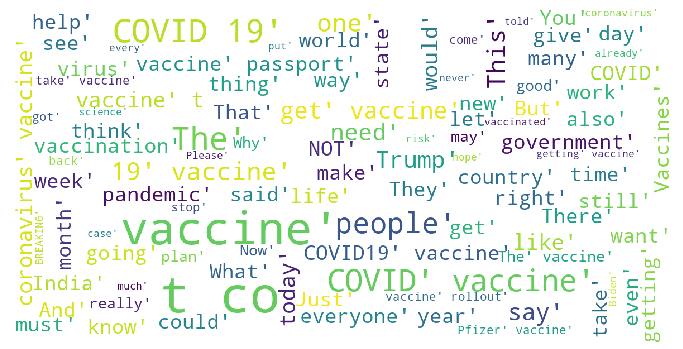

In [80]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(tweet):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(tweet))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [81]:
train_tweets.head()

,date,tweet,month,year,tt,sentiment,polarity,subjectivity,sentiment1,sentiment2
1119,2021-04-21,"Logistics, Storage, Management, Manpower, Dist...",4,2021,"[Logistics, ,, Storage, ,, Management, ,, Manp...","(0.25, 0.5)",0.25000,0.50000,positive,subjective
17555,2020-12-04,Can we all take a second to think about the fa...,12,2020,"[Can, we, all, take, a, second, to, think, abo...","(0.04375, 0.35625)",0.04375,0.35625,positive,objective
11496,2021-01-28,Were Brussels steaming ahead of Brexit Britain...,1,2021,"[Were, Brussels, steaming, ahead, of, Brexit, ...","(0.21875, 0.325)",0.21875,0.32500,positive,objective
18559,2020-11-18,There is a lot of hubbub about RNA vaccines &a...,11,2020,"[There, is, a, lot, of, hubbub, about, RNA, va...","(0.0, 0.0)",0.00000,0.00000,neutral,objective
3583,2021-04-07,The cheap ‘non profit’ vaccine getting targete...,4,2021,"[The, cheap, ‘, non, profit, ’, vaccine, getti...","(0.4, 0.7)",0.40000,0.70000,positive,subjective


In [82]:
subset = ['tweet','sentiment1']
train_tweets2 = train_tweets.loc[:, subset] 
train_tweets2.head() 

,tweet,sentiment1
1119,"Logistics, Storage, Management, Manpower, Dist...",positive
17555,Can we all take a second to think about the fa...,positive
11496,Were Brussels steaming ahead of Brexit Britain...,positive
18559,There is a lot of hubbub about RNA vaccines &a...,neutral
3583,The cheap ‘non profit’ vaccine getting targete...,positive


In [83]:
train_tweets2.sentiment1.value_counts()

positive    9368
neutral     4894
negative    3668
Name: sentiment1, dtype: int64

#### Converting target variable into numbers

In [84]:
train_tweets2.replace({'negative': 0, 'positive': 1, 'neutral':2}, inplace = True)

In [85]:
train_tweets2.head(10)

,tweet,sentiment1
1119,"Logistics, Storage, Management, Manpower, Dist...",1
17555,Can we all take a second to think about the fa...,1
11496,Were Brussels steaming ahead of Brexit Britain...,1
18559,There is a lot of hubbub about RNA vaccines &a...,2
3583,The cheap ‘non profit’ vaccine getting targete...,1
19253,Wondering why @pfizer didn't release this amaz...,1
14391,FIRST: 15 days to flatten the curve. THEN: Ju...,1
1120,FRESH HELL—Most participants (of vaccine hesit...,1
21438,We are making progress across so many fronts a...,1
18756,"Me, the SECOND after I get my corona vaccine ...",2


In [86]:
train_tweets2.sentiment1.value_counts() 

1    9368
2    4894
0    3668
Name: sentiment1, dtype: int64

In [87]:
data = train_tweets2.tweet
target = train_tweets2.sentiment1

In [88]:
# stopwords = nltk.corpus.stopwords.words('english')
# new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
# for i in new_words:
#     stopwords.append(i)
# print(stopwords)

#### removing the stopwords and tokenizing 

In [89]:
## tokenize tweets and remove stopwords
def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [90]:
processed_tweet = list(map(process_tweet,data)) 

In [91]:
processed_tweet 

[['logistics',
  ',',
  'storage',
  ',',
  'management',
  ',',
  'manpower',
  ',',
  'distribution',
  ',',
  'access',
  ',',
  'vaccine',
  'numbers',
  'etc',
  'etc',
  '.',
  '’',
  'll',
  'millions',
  'people',
  'suddenly',
  'rushing',
  'vaccination',
  'country',
  '.',
  '’',
  's',
  'okay',
  'sometimes',
  'ridicule',
  'every',
  'decision',
  'government',
  'try',
  'see',
  'logic',
  '.'],
 ['take',
  'second',
  'think',
  'fact',
  'government',
  'willing',
  'falsely',
  'claim',
  'approving',
  'vaccine',
  'weeks',
  'earlier',
  'huge',
  'brexit',
  'health',
  'success',
  ',',
  'wo',
  "n't",
  'acknowledge',
  'every',
  'medical',
  'authority',
  'uk',
  'says',
  'brexit',
  'health',
  'disaster',
  '?'],
 ['brussels',
  'steaming',
  'ahead',
  'brexit',
  'britain',
  ',',
  'placing',
  'vaccine',
  'orders',
  'ahead',
  'us',
  ',',
  'remainers',
  'squeal',
  'act',
  'egregious',
  'self',
  'harm',
  'inflicted',
  'upon',
  'nation',
 

In [92]:
tweet_concat = []
for tweet in processed_tweet:
    tweet_concat += tweet 

In [93]:
tweet_freqdist = FreqDist(tweet_concat)
tweet_freqdist.most_common(260) 

[('.', 27933),
 (',', 16598),
 ('vaccine', 16286),
 (':', 10034),
 ('’', 7752),
 ('https', 5743),
 ('vaccines', 4260),
 ('?', 3751),
 ('@', 3342),
 ('!', 3269),
 ('#', 3067),
 ('s', 3063),
 ('will', 2790),
 ('covid', 2639),
 (';', 2600),
 ('people', 2514),
 ("'s", 2447),
 ('&', 2380),
 ('amp', 2274),
 ('t', 2205),
 ('now', 1651),
 ("n't", 1609),
 ('covid-19', 1574),
 ("''", 1551),
 ('``', 1546),
 ('first', 1515),
 (')', 1455),
 ('“', 1431),
 ('-', 1424),
 ('”', 1407),
 ('trump', 1401),
 ('%', 1359),
 ('one', 1322),
 ('us', 1312),
 ('(', 1251),
 ('coronavirus', 1157),
 ('today', 1093),
 ('pfizer', 1053),
 ('...', 1003),
 ('take', 991),
 ('got', 991),
 ('million', 951),
 ('doses', 948),
 ('need', 930),
 ('new', 892),
 ('getting', 885),
 ('biden', 821),
 ('covid19', 799),
 ('vaccinated', 755),
 ('*', 745),
 ('virus', 743),
 ('india', 730),
 ('don', 723),
 ('health', 706),
 ('know', 704),
 ('dose', 702),
 ('time', 681),
 ('make', 672),
 ('government', 668),
 ('m', 662),
 ('want', 654),
 ('

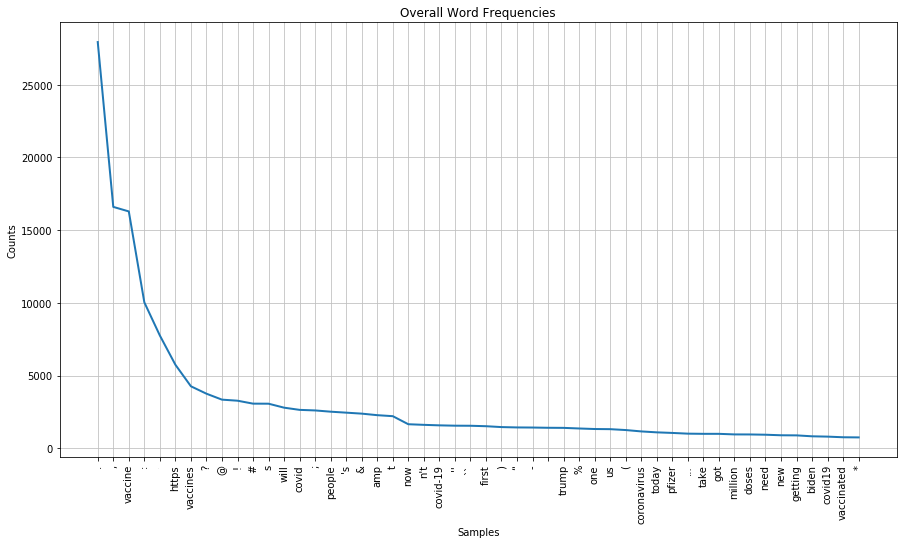

In [94]:
plt.figure(figsize=(15,8))
plt.title('Overall Word Frequencies')
tweet_freqdist.plot(50)

#### Lemmantizing training data 

In [95]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_tweet:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [96]:
Data = {'tweet':lemmatized_output, 'sentiment1':target}
train_tweet_lemmantized = pd.DataFrame(Data)

In [97]:
train_tweet_lemmantized.to_csv('train_tweet_lemmantized.csv', index=False)

In [98]:
train_tweet_lemmantized.head() 

,tweet,sentiment1
1119,"logistics , storage , management , manpower , ...",1
17555,take second think fact government willing fals...,1
11496,"brussels steaming ahead brexit britain , placi...",1
18559,lot hubbub rna vaccine & amp ; 'm rna biologis...,2
3583,cheap ‘ non profit ’ vaccine getting targeted ...,1


In [99]:
negative_tweet_freq = train_tweet_lemmantized[train_tweet_lemmantized['sentiment1']==0]
positive_tweet_freq = train_tweet_lemmantized[train_tweet_lemmantized['sentiment1']==1]
neutral_tweet_freq = train_tweet_lemmantized[train_tweet_lemmantized['sentiment1']==2]

In [100]:
negative_tweet_data = negative_tweet_freq['tweet']
positive_tweet_data = positive_tweet_freq['tweet']
neutral_tweet_data = neutral_tweet_freq['tweet'] 

In [101]:
negative_tweet_freq.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 8954 to 2069
Data columns (total 2 columns):
tweet         3668 non-null object
sentiment1    3668 non-null int64
dtypes: int64(1), object(1)
memory usage: 86.0+ KB


In [102]:
negative_tweet_data.head()

8954    sends bad message daw public yung pagrefuse sa...
8554    saturday , fda issued emergency use authorizat...
5510    ’ m convinced @ fordnation struggling distribu...
5072    : ⚪️ man ⚪️ woman 🔘 washington state resident ...
9536    @ roxannelawin brazil , america brazilian lite...
Name: tweet, dtype: object

#### Processing Sentiments individually

In [103]:
processed_negative_t = list(map(process_tweet, negative_tweet_data.tolist())) 
processed_positive_t = list(map(process_tweet, positive_tweet_data.tolist())) 
processed_neutral_t = list(map(process_tweet, neutral_tweet_data.tolist())) 

In [104]:
total_negative_t = set()
for comment in processed_negative_t:
    total_negative_t.update(comment)
len(total_negative_t)

12835

In [105]:
total_positive_t = set()
for comment in processed_positive_t:
    total_positive_t.update(comment)
len(total_positive_t)

22477

In [106]:
total_neutral_t = set()
for comment in processed_neutral_t:
    total_neutral_t.update(comment)
len(total_neutral_t)

14794

In [107]:
all_negative_t = [item for sublist in processed_negative_t for item in sublist]
all_positive_t = [item for sublist in processed_positive_t for item in sublist]
all_neutral_t = [item for sublist in processed_neutral_t for item in sublist] 

In [108]:
negative_tweet_data = FreqDist(all_negative_t)
positive_tweet_data = FreqDist(all_positive_t)
neutral_tweet_data = FreqDist(all_neutral_t)

In [109]:
negative_tweet_data.most_common(10)

[('.', 6700),
 ('vaccine', 4204),
 (',', 3902),
 ('’', 1850),
 (':', 1650),
 ('?', 952),
 ('``', 839),
 ('s', 701),
 ('@', 684),
 ('people', 652)]

In [110]:
positive_tweet_data.most_common(10)

[('.', 16803),
 ('vaccine', 11129),
 (',', 9891),
 (':', 5426),
 ('’', 4244),
 ('@', 1954),
 ('!', 1884),
 ('?', 1798),
 ('will', 1772),
 ('s', 1768)]

In [111]:
neutral_tweet_data.most_common(10) 

[('vaccine', 5235),
 ('.', 4711),
 (':', 2959),
 (',', 2805),
 ('’', 1658),
 ('?', 1001),
 ('#', 759),
 ('!', 759),
 ('@', 704),
 ('s', 595)]

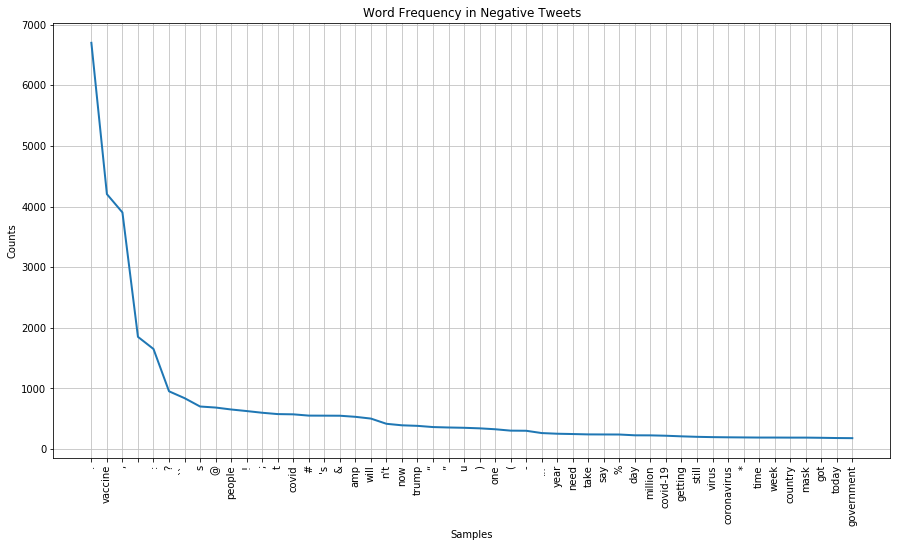

In [112]:
plt.figure(figsize=(15,8))
plt.title('Word Frequency in Negative Tweets')
negative_tweet_data.plot(50)

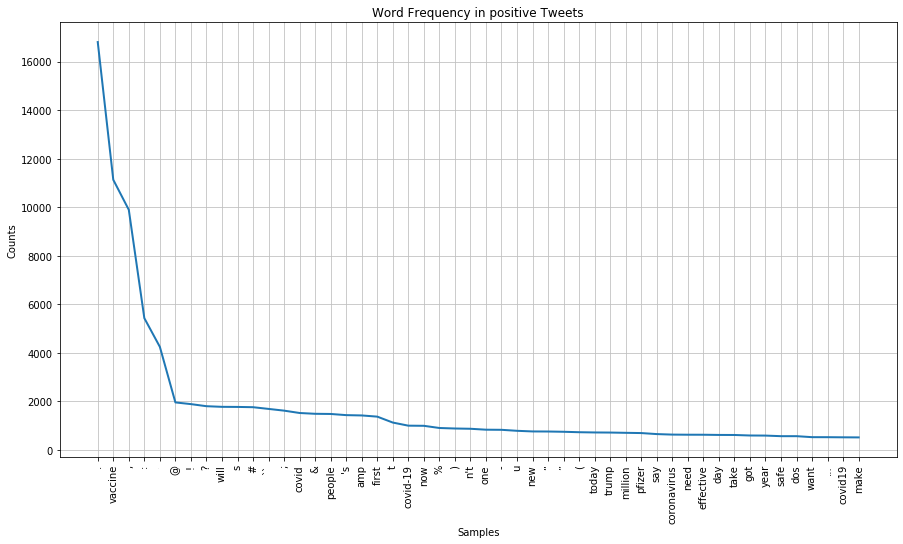

In [113]:
plt.figure(figsize=(15,8))
plt.title('Word Frequency in positive Tweets')
positive_tweet_data.plot(50)

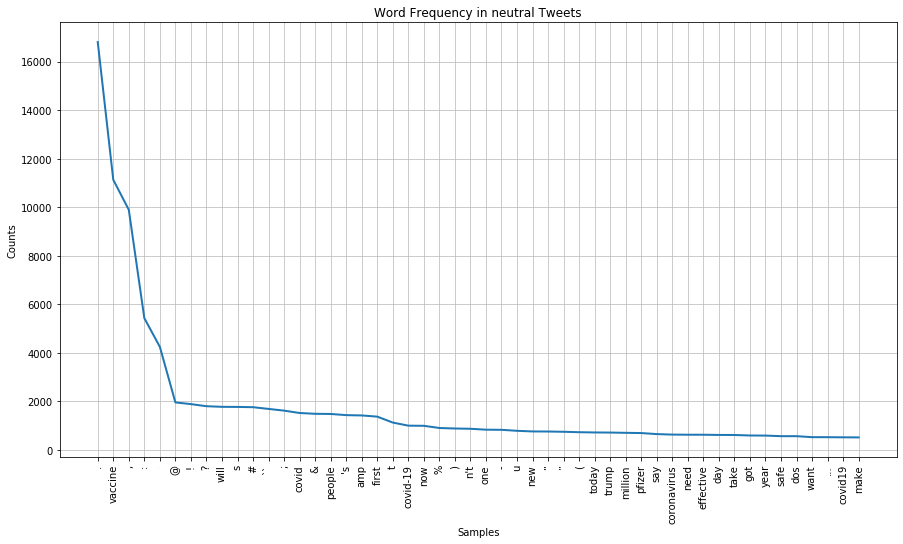

In [114]:
plt.figure(figsize=(15,8))
plt.title('Word Frequency in neutral Tweets')
positive_tweet_data.plot(50)

### Test Tweet EDA

#### Stop words and Corpus

In [115]:
stopwords1 = list(nltk.corpus.stopwords.words('english'))
new_words1 =['&amp;','http','https','co',"''", '""', '...', '``','@','#',"'","`",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%']
stopwords1.extend(new_words1)
print(stopwords1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [116]:
corpus1=[]
newtt1= test_tweets['tweet'].str.split()
newtt1=newtt1.values.tolist() 
corpus1=[word for i in newtt1 for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus1:
    if word in stopwords1:
        dic[word]+=1

#### Plotting the top 10 stopwords & non stopwords

In [117]:
def plot_top_stopwords_barchart1(tweet):
#     stopwords = nltk.corpus.stopwords.words('english')    
#     new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
#     for i in new_words:
#         stopwords.append(i)
   
    newtt1= test_tweets['tweet'].str.split()
    newtt1=newtt1.values.tolist() 
    corpus1=[word for i in newtt for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus1:
        if word in stopwords:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

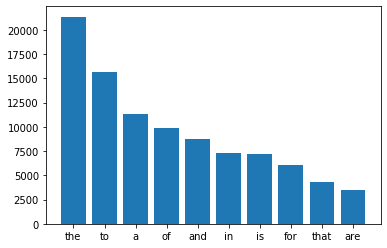

In [118]:
plot_top_stopwords_barchart1(test_tweets['tweet']) 

#### Word level Analysis on through counter function
- A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

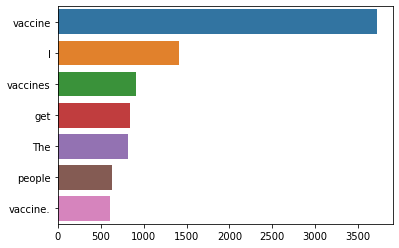

In [119]:
from collections import  Counter
counter1=Counter(corpus1)
most1=counter1.most_common()

x, y= [], []
for word,count in most1[:40]:
    if (word not in stopwords1):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [120]:
from collections import  Counter

def plot_top_non_stopwords_barchart1(tweet):

    newtt1= test_tweets['tweet'].str.split() 
    newtt1=newtt1.values.tolist()
    corpus1=[word for i in newtt1 for word in i]

    counter1=Counter(corpus1)
    most1=counter1.most_common()
    x, y=[], []
    for word,count in most1[:40]:
        if (word not in stopwords1):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

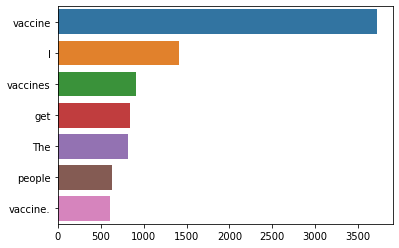

In [121]:
plot_top_non_stopwords_barchart1(test_tweets['tweet'])

### Ngram exploration

In [124]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram1(corpus1, n=None):
    vec1 = CountVectorizer(ngram_range=(n, n)).fit(corpus1)
    bag_of_words1 = vec1.transform(corpus1)
    sum_words1 = bag_of_words1.sum(axis=0) 
    words_freq1 = [(word, sum_words1[0, idx]) 
                  for word, idx in vec1.vocabulary_.items()]
    words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)
    return words_freq1[:10]

In [125]:
def plot_top_ngrams_barchart1(tweet, n=2):
      
    newtt1= test_tweets['tweet'].str.split()
    newtt1=newtt1.values.tolist()
    corpus1=[word for i in newtt1 for word in i]


    def _get_top_ngram1(corpus1, n=None):
        vec1 = CountVectorizer(ngram_range=(n, n)).fit(corpus1)
        bag_of_words1 = vec1.transform(corpus)
        sum_words1 = bag_of_words1.sum(axis=0) 
        words_freq1 = [(word, sum_words1[0, idx]) 
                      for word, idx in vec1.vocabulary_.items()]
        words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)
        return words_freq1[:10]
    for word,count in most1[:40]:
        if (word not in stopwords1):
            x.append(word)
            y.append(count)
        top_n_bigrams1=_get_top_ngram1(tweet,n)[:10]
        x,y=map(list,zip(*top_n_bigrams1))
        sns.barplot(x=y,y=x)

In [126]:
plot_top_ngrams_barchart1(test_tweets['tweet'],1)

AttributeError: 'list' object has no attribute 'lower'

#### Top N Bigram

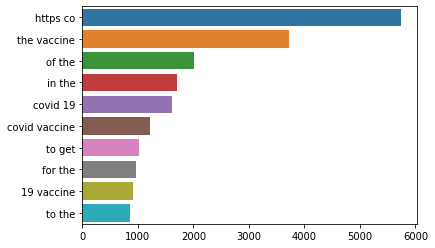

In [72]:
plot_top_ngrams_barchart(train_tweets['tweet'],2)

#### Top N Trigram

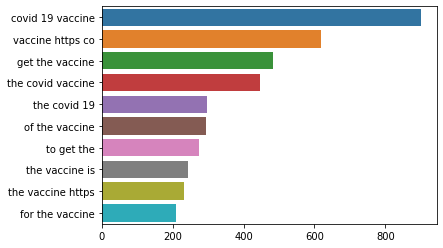

In [73]:
plot_top_ngrams_barchart(train_tweets['tweet'],3) 

#### Top N Quadgram

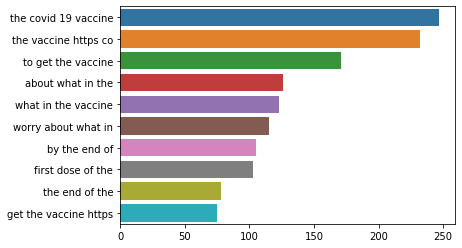

In [74]:
plot_top_ngrams_barchart(train_tweets['tweet'],4)  

In [75]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_tweet(train_tweets):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tweet in train_tweets['tweet']:
        words=[w for w in word_tokenize(tweet) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_tweet(train_tweets) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Bag Of Words using genism & the LDA model: Latent Dirichlet Allocation (LDA)

In [76]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [77]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.060*"vaccine" + 0.011*"get" + 0.009*"people" + 0.008*"The" + 0.007*"Trump" + 0.007*"one" + 0.006*"first" + 0.005*"got" + 0.005*"Biden" + 0.005*"take"'),
 (1,
  '0.059*"vaccine" + 0.011*"get" + 0.007*"people" + 0.006*"mask" + 0.006*"The" + 0.005*"need" + 0.005*"passport" + 0.004*"like" + 0.004*"Covid" + 0.004*"getting"'),
 (2,
  '0.011*"Vaccine" + 0.010*"vaccine" + 0.007*"VACCINE" + 0.005*"THE" + 0.004*"Speed" + 0.004*"Warp" + 0.004*"Operation" + 0.003*"COVID" + 0.003*"Gates" + 0.003*"Dr."'),
 (3,
  '0.051*"vaccine" + 0.010*"dos" + 0.009*"million" + 0.009*"India" + 0.008*"The" + 0.007*"Pfizer" + 0.007*"COVID-19" + 0.005*"trial" + 0.005*"coronavirus" + 0.005*"COVID19"')]

In [78]:
from pyLDAvis import gensim_models

#### Python LDA visualization through pyLDAvis

In [79]:
import pyLDAvis
import pyLDAvis.sklearn
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
pyLDAvis.enable_notebook() 
vis = gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.125378  0.026749       1        1  41.024085
1      0.086945  0.106249       2        1  28.019775
3      0.040479 -0.157576       3        1  23.579145
2     -0.252802  0.024577       4        1   7.376995, topic_info=                 Term         Freq        Total Category  logprob  loglift
6             Vaccine   889.000000   889.000000  Default  30.0000  30.0000
472             India   649.000000   649.000000  Default  29.0000  29.0000
1364              dos   844.000000   844.000000  Default  28.0000  28.0000
1084             mask   588.000000   588.000000  Default  27.0000  27.0000
128               get  2399.000000  2399.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1542          company    40.594625   280.207024   Topic4  -6.3564   0.6749
211   realDonaldTrump    37.480939   230.664239   Topic4  -6.4362   0.7897
303             Fauci    35.188170   252.854791   Topic4  -6.4993   0.6347
400             Trump    44.899838  1188.143083   Topic4  -6.2556  -0.6689
87                The    34.500143  2232.268060   Topic4  -6.5190  -1.5630

[315 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4751      1  0.029894        AND
4751      2  0.209257        AND
4751      3  0.074735        AND
4751      4  0.687560        AND
1394      4  0.979438        ARE
...     ...       ...        ...
605       3  0.138066       year
605       4  0.004490       year
259       3  0.985421       yung
4391      4  0.965294        में
3839      4  0.963096  新型コロナワクチン

[576 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

#### Wordcloud

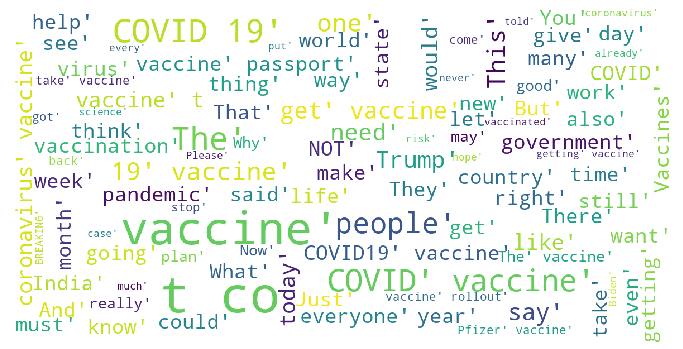

In [80]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(tweet):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(tweet))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [81]:
train_tweets.head()

,date,tweet,month,year,tt,sentiment,polarity,subjectivity,sentiment1,sentiment2
1119,2021-04-21,"Logistics, Storage, Management, Manpower, Dist...",4,2021,"[Logistics, ,, Storage, ,, Management, ,, Manp...","(0.25, 0.5)",0.25000,0.50000,positive,subjective
17555,2020-12-04,Can we all take a second to think about the fa...,12,2020,"[Can, we, all, take, a, second, to, think, abo...","(0.04375, 0.35625)",0.04375,0.35625,positive,objective
11496,2021-01-28,Were Brussels steaming ahead of Brexit Britain...,1,2021,"[Were, Brussels, steaming, ahead, of, Brexit, ...","(0.21875, 0.325)",0.21875,0.32500,positive,objective
18559,2020-11-18,There is a lot of hubbub about RNA vaccines &a...,11,2020,"[There, is, a, lot, of, hubbub, about, RNA, va...","(0.0, 0.0)",0.00000,0.00000,neutral,objective
3583,2021-04-07,The cheap ‘non profit’ vaccine getting targete...,4,2021,"[The, cheap, ‘, non, profit, ’, vaccine, getti...","(0.4, 0.7)",0.40000,0.70000,positive,subjective


In [82]:
subset = ['tweet','sentiment1']
train_tweets2 = train_tweets.loc[:, subset] 
train_tweets2.head() 

,tweet,sentiment1
1119,"Logistics, Storage, Management, Manpower, Dist...",positive
17555,Can we all take a second to think about the fa...,positive
11496,Were Brussels steaming ahead of Brexit Britain...,positive
18559,There is a lot of hubbub about RNA vaccines &a...,neutral
3583,The cheap ‘non profit’ vaccine getting targete...,positive


In [83]:
train_tweets2.sentiment1.value_counts()

positive    9368
neutral     4894
negative    3668
Name: sentiment1, dtype: int64

#### Converting target variable into numbers

In [84]:
train_tweets2.replace({'negative': 0, 'positive': 1, 'neutral':2}, inplace = True)

In [85]:
train_tweets2.head(10)

,tweet,sentiment1
1119,"Logistics, Storage, Management, Manpower, Dist...",1
17555,Can we all take a second to think about the fa...,1
11496,Were Brussels steaming ahead of Brexit Britain...,1
18559,There is a lot of hubbub about RNA vaccines &a...,2
3583,The cheap ‘non profit’ vaccine getting targete...,1
19253,Wondering why @pfizer didn't release this amaz...,1
14391,FIRST: 15 days to flatten the curve. THEN: Ju...,1
1120,FRESH HELL—Most participants (of vaccine hesit...,1
21438,We are making progress across so many fronts a...,1
18756,"Me, the SECOND after I get my corona vaccine ...",2


In [86]:
train_tweets2.sentiment1.value_counts() 

1    9368
2    4894
0    3668
Name: sentiment1, dtype: int64

In [87]:
data = train_tweets2.tweet
target = train_tweets2.sentiment1

In [88]:
# stopwords = nltk.corpus.stopwords.words('english')
# new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
#            '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
#            "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
# for i in new_words:
#     stopwords.append(i)
# print(stopwords)

#### removing the stopwords and tokenizing 

In [89]:
## tokenize tweets and remove stopwords
def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [90]:
processed_tweet = list(map(process_tweet,data)) 

In [91]:
processed_tweet 

[['logistics',
  ',',
  'storage',
  ',',
  'management',
  ',',
  'manpower',
  ',',
  'distribution',
  ',',
  'access',
  ',',
  'vaccine',
  'numbers',
  'etc',
  'etc',
  '.',
  '’',
  'll',
  'millions',
  'people',
  'suddenly',
  'rushing',
  'vaccination',
  'country',
  '.',
  '’',
  's',
  'okay',
  'sometimes',
  'ridicule',
  'every',
  'decision',
  'government',
  'try',
  'see',
  'logic',
  '.'],
 ['take',
  'second',
  'think',
  'fact',
  'government',
  'willing',
  'falsely',
  'claim',
  'approving',
  'vaccine',
  'weeks',
  'earlier',
  'huge',
  'brexit',
  'health',
  'success',
  ',',
  'wo',
  "n't",
  'acknowledge',
  'every',
  'medical',
  'authority',
  'uk',
  'says',
  'brexit',
  'health',
  'disaster',
  '?'],
 ['brussels',
  'steaming',
  'ahead',
  'brexit',
  'britain',
  ',',
  'placing',
  'vaccine',
  'orders',
  'ahead',
  'us',
  ',',
  'remainers',
  'squeal',
  'act',
  'egregious',
  'self',
  'harm',
  'inflicted',
  'upon',
  'nation',
 

In [92]:
tweet_concat = []
for tweet in processed_tweet:
    tweet_concat += tweet 

In [93]:
tweet_freqdist = FreqDist(tweet_concat)
tweet_freqdist.most_common(260) 

[('.', 27933),
 (',', 16598),
 ('vaccine', 16286),
 (':', 10034),
 ('’', 7752),
 ('https', 5743),
 ('vaccines', 4260),
 ('?', 3751),
 ('@', 3342),
 ('!', 3269),
 ('#', 3067),
 ('s', 3063),
 ('will', 2790),
 ('covid', 2639),
 (';', 2600),
 ('people', 2514),
 ("'s", 2447),
 ('&', 2380),
 ('amp', 2274),
 ('t', 2205),
 ('now', 1651),
 ("n't", 1609),
 ('covid-19', 1574),
 ("''", 1551),
 ('``', 1546),
 ('first', 1515),
 (')', 1455),
 ('“', 1431),
 ('-', 1424),
 ('”', 1407),
 ('trump', 1401),
 ('%', 1359),
 ('one', 1322),
 ('us', 1312),
 ('(', 1251),
 ('coronavirus', 1157),
 ('today', 1093),
 ('pfizer', 1053),
 ('...', 1003),
 ('take', 991),
 ('got', 991),
 ('million', 951),
 ('doses', 948),
 ('need', 930),
 ('new', 892),
 ('getting', 885),
 ('biden', 821),
 ('covid19', 799),
 ('vaccinated', 755),
 ('*', 745),
 ('virus', 743),
 ('india', 730),
 ('don', 723),
 ('health', 706),
 ('know', 704),
 ('dose', 702),
 ('time', 681),
 ('make', 672),
 ('government', 668),
 ('m', 662),
 ('want', 654),
 ('

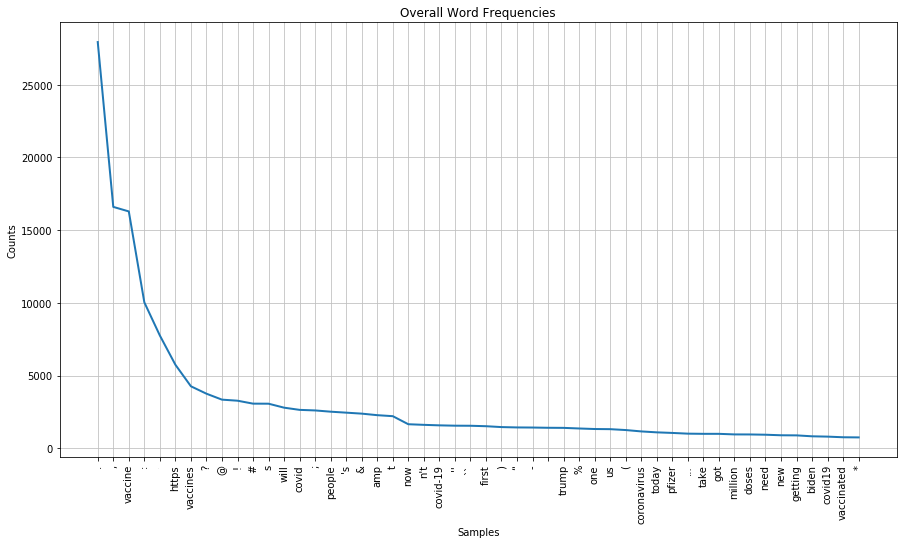

In [94]:
plt.figure(figsize=(15,8))
plt.title('Overall Word Frequencies')
tweet_freqdist.plot(50)

#### Lemmantizing training data 

In [95]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_tweet:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [96]:
Data = {'tweet':lemmatized_output, 'sentiment1':target}
train_tweet_lemmantized = pd.DataFrame(Data)

In [97]:
train_tweet_lemmantized.to_csv('train_tweet_lemmantized.csv', index=False)

In [98]:
train_tweet_lemmantized.head() 

,tweet,sentiment1
1119,"logistics , storage , management , manpower , ...",1
17555,take second think fact government willing fals...,1
11496,"brussels steaming ahead brexit britain , placi...",1
18559,lot hubbub rna vaccine & amp ; 'm rna biologis...,2
3583,cheap ‘ non profit ’ vaccine getting targeted ...,1


In [99]:
negative_tweet_freq = train_tweet_lemmantized[train_tweet_lemmantized['sentiment1']==0]
positive_tweet_freq = train_tweet_lemmantized[train_tweet_lemmantized['sentiment1']==1]
neutral_tweet_freq = train_tweet_lemmantized[train_tweet_lemmantized['sentiment1']==2]

In [100]:
negative_tweet_data = negative_tweet_freq['tweet']
positive_tweet_data = positive_tweet_freq['tweet']
neutral_tweet_data = neutral_tweet_freq['tweet'] 

In [101]:
negative_tweet_freq.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 8954 to 2069
Data columns (total 2 columns):
tweet         3668 non-null object
sentiment1    3668 non-null int64
dtypes: int64(1), object(1)
memory usage: 86.0+ KB


In [102]:
negative_tweet_data.head()

8954    sends bad message daw public yung pagrefuse sa...
8554    saturday , fda issued emergency use authorizat...
5510    ’ m convinced @ fordnation struggling distribu...
5072    : ⚪️ man ⚪️ woman 🔘 washington state resident ...
9536    @ roxannelawin brazil , america brazilian lite...
Name: tweet, dtype: object

#### Processing Sentiments individually

In [103]:
processed_negative_t = list(map(process_tweet, negative_tweet_data.tolist())) 
processed_positive_t = list(map(process_tweet, positive_tweet_data.tolist())) 
processed_neutral_t = list(map(process_tweet, neutral_tweet_data.tolist())) 

In [104]:
total_negative_t = set()
for comment in processed_negative_t:
    total_negative_t.update(comment)
len(total_negative_t)

12835

In [105]:
total_positive_t = set()
for comment in processed_positive_t:
    total_positive_t.update(comment)
len(total_positive_t)

22477

In [106]:
total_neutral_t = set()
for comment in processed_neutral_t:
    total_neutral_t.update(comment)
len(total_neutral_t)

14794

In [107]:
all_negative_t = [item for sublist in processed_negative_t for item in sublist]
all_positive_t = [item for sublist in processed_positive_t for item in sublist]
all_neutral_t = [item for sublist in processed_neutral_t for item in sublist] 

In [108]:
negative_tweet_data = FreqDist(all_negative_t)
positive_tweet_data = FreqDist(all_positive_t)
neutral_tweet_data = FreqDist(all_neutral_t)

In [109]:
negative_tweet_data.most_common(10)

[('.', 6700),
 ('vaccine', 4204),
 (',', 3902),
 ('’', 1850),
 (':', 1650),
 ('?', 952),
 ('``', 839),
 ('s', 701),
 ('@', 684),
 ('people', 652)]

In [110]:
positive_tweet_data.most_common(10)

[('.', 16803),
 ('vaccine', 11129),
 (',', 9891),
 (':', 5426),
 ('’', 4244),
 ('@', 1954),
 ('!', 1884),
 ('?', 1798),
 ('will', 1772),
 ('s', 1768)]

In [111]:
neutral_tweet_data.most_common(10) 

[('vaccine', 5235),
 ('.', 4711),
 (':', 2959),
 (',', 2805),
 ('’', 1658),
 ('?', 1001),
 ('#', 759),
 ('!', 759),
 ('@', 704),
 ('s', 595)]

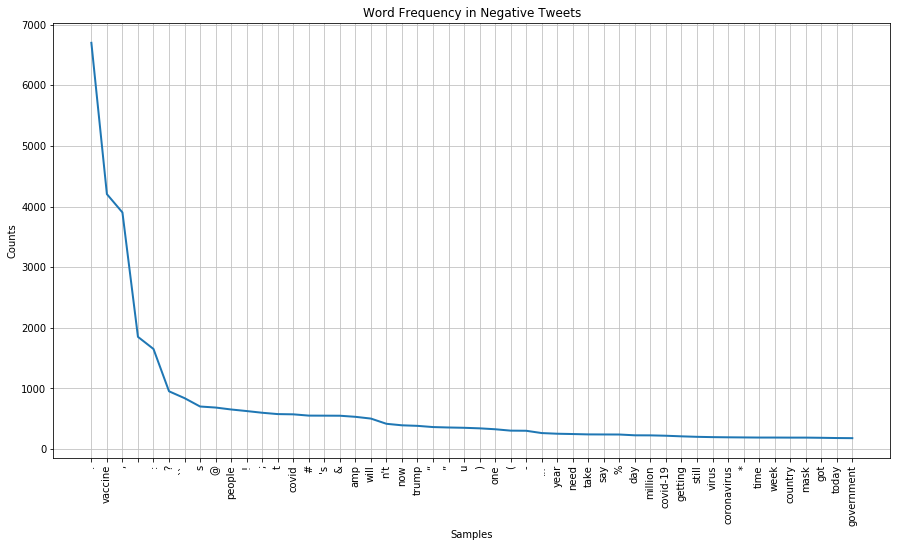

In [112]:
plt.figure(figsize=(15,8))
plt.title('Word Frequency in Negative Tweets')
negative_tweet_data.plot(50)

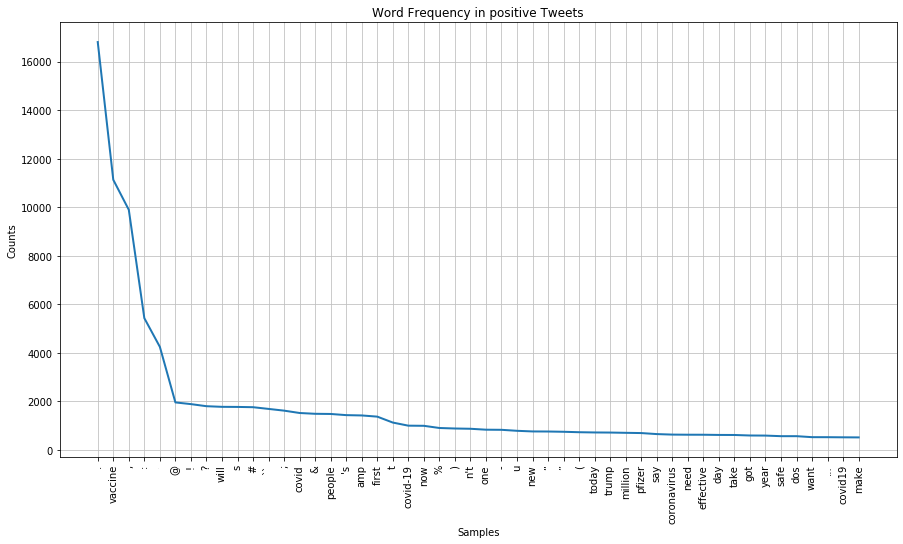

In [113]:
plt.figure(figsize=(15,8))
plt.title('Word Frequency in positive Tweets')
positive_tweet_data.plot(50)

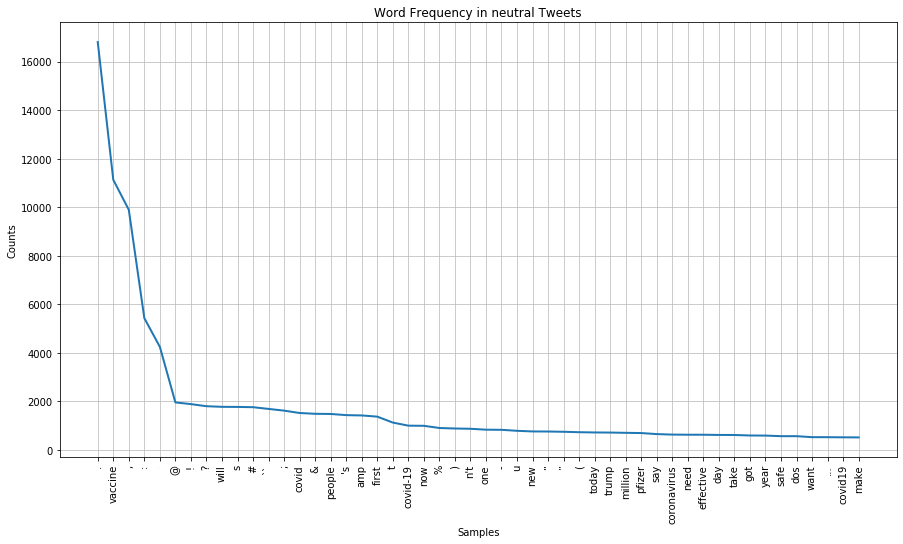

In [114]:
plt.figure(figsize=(15,8))
plt.title('Word Frequency in neutral Tweets')
positive_tweet_data.plot(50)